# $k$-Means++

## By: Grace Hill and Meet Patel

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

### DrivFace

In [3]:
df = pd.read_csv("DrivFace/drivPoints.csv")
df.drop("fileName", axis = 1, inplace = True)

In [4]:
df

,subject,imgNum,label,ang,xF,yF,wF,hF,xRE,yRE,xLE,yLE,xN,yN,xRM,yRM,xLM,yLM
0,1,1,2,0,292,209,100,112,323,232,367,231,353,254,332,278,361,278
1,1,2,2,0,286,200,109,128,324,235,366,235,353,258,333,281,361,281
2,1,3,2,0,290,204,105,121,325,240,367,239,351,260,334,282,362,282
3,1,4,2,0,287,202,112,118,325,230,369,230,353,253,335,274,362,275
4,1,5,2,0,290,193,104,119,325,224,366,225,353,244,333,268,363,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,4,86,2,-15,278,183,128,141,307,218,354,210,330,247,324,273,356,266
602,4,87,1,-30,268,186,128,134,296,222,344,212,319,247,316,274,347,269
603,4,88,1,-30,264,187,127,131,287,220,334,211,304,247,305,272,337,270
604,4,89,2,-15,264,175,143,136,295,207,345,200,320,234,314,261,351,251


In [5]:
df.var()

subject       1.089960
imgNum     2427.905998
label         0.099075
ang         204.992226
xF          354.092936
yF         1554.186676
wF           51.614546
hF           73.495808
xRE         421.548417
yRE        1460.034302
xLE         391.366489
yLE        1634.342460
xN          589.867998
yN         1554.672626
xRM         360.593953
yRM        1531.108990
xLM         366.839989
yLM        1685.350978
dtype: float64

In [6]:
inertias = []
for i in range(1,10):
    drivface_model = KMeans(n_clusters = i).fit(df)
    inertias.append(drivface_model.inertia_)

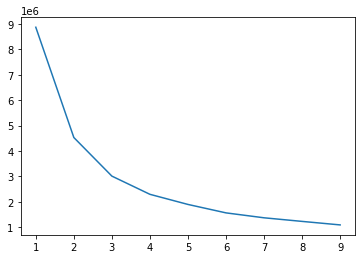

In [7]:
plt.plot(np.arange(1, 10), inertias)

In [8]:
drivface_model = KMeans(n_clusters = 3, init = 'random', verbose = True).fit(df)
drivface_model.inertia_

Initialization complete
Iteration 0, inertia 6947069.0
Iteration 1, inertia 3385837.0978356553
Iteration 2, inertia 3061598.171664182
Iteration 3, inertia 3021712.6400899873
Iteration 4, inertia 3015434.0531062866
Iteration 5, inertia 3013586.3121414045
Iteration 6, inertia 3012872.2512446484
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 10314191.0
Iteration 1, inertia 5142001.445450561
Iteration 2, inertia 3987153.4780352414
Iteration 3, inertia 3644169.530484736
Iteration 4, inertia 3340168.185961444
Iteration 5, inertia 3259120.67129214
Iteration 6, inertia 3070191.6621790975
Iteration 7, inertia 3030274.8734680824
Iteration 8, inertia 3028677.160595192
Iteration 9, inertia 3028620.016545458
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 5377100.0
Iteration 1, inertia 3323819.11394785
Iteration 2, inertia 3058731.9812978273
Iteration 3, inertia 3021664.5085392892
Iteration 4, inertia 3013010.809

3012872.251244648

### Concentric Circles Synthetic Dataset

In [9]:
conc_circ_outer_x = np.random.rand(100)

In [10]:
conc_circ_outer_y = np.sqrt(1 - np.power(conc_circ_outer_x, 2))

In [11]:
for idx in range(len(conc_circ_outer_x)):
    if np.random.rand() > 0.5:
        conc_circ_outer_x[idx] *= -1
for idx in range(len(conc_circ_outer_y)):
    if np.random.rand() > 0.5:
        conc_circ_outer_y[idx] *= -1

In [12]:
conc_circ_outer_x *= 5
conc_circ_outer_y *= 5

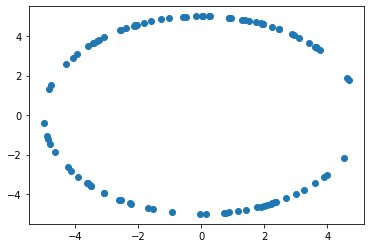

In [13]:
plt.scatter(conc_circ_outer_x, conc_circ_outer_y)

In [14]:
conc_circ_inner_theta = np.random.rand((100)) * (2 * np.pi)
conc_circ_inner_r = np.random.rand(100)
conc_circ_inner_x, conc_circ_inner_y = conc_circ_inner_r * np.cos(conc_circ_inner_theta), conc_circ_inner_r * np.sin(conc_circ_inner_theta)

In [15]:
conc_circ_x = np.append(conc_circ_inner_x, conc_circ_outer_x)
conc_circ_y = np.append(conc_circ_inner_y, conc_circ_outer_y)

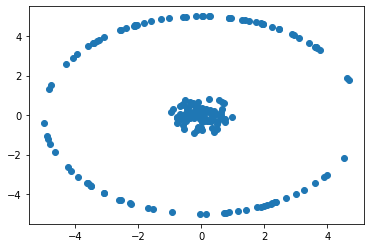

In [16]:
plt.scatter(conc_circ_x, conc_circ_y)

In [17]:
conc_circ_model = KMeans(n_clusters = 2, init = 'random', verbose = True).fit(list(zip(conc_circ_x, conc_circ_y)))

Initialization complete
Iteration 0, inertia 1659.5823804649924
Iteration 1, inertia 1437.0196668859166
Iteration 2, inertia 1392.9384525392106
Iteration 3, inertia 1392.3041225960485
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 6331.075892579711
Iteration 1, inertia 2096.3936102626617
Iteration 2, inertia 2085.472905656824
Iteration 3, inertia 2004.779130666978
Iteration 4, inertia 1634.4996626424947
Iteration 5, inertia 1397.1424736488912
Iteration 6, inertia 1392.3041225960485
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2316.8514386820225
Iteration 1, inertia 1624.490937993598
Iteration 2, inertia 1552.9499089988888
Iteration 3, inertia 1545.019920977074
Iteration 4, inertia 1543.8654959399908
Iteration 5, inertia 1542.8346460972941
Iteration 6, inertia 1541.9923805445678
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1848.746271360999
Iteration 1,

In [18]:
conc_circ_model.cluster_centers_

array([[ 0.12824426,  4.19644975],
       [-0.25503876, -1.15392756]])

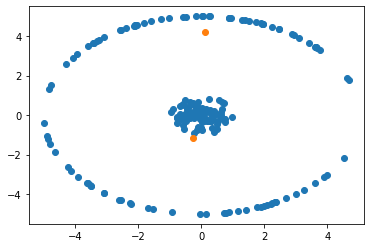

In [19]:
plt.scatter(conc_circ_x, conc_circ_y)
plt.scatter(list(zip(*conc_circ_model.cluster_centers_))[0], list(zip(*conc_circ_model.cluster_centers_))[1])

### $[0, 1]^2$ Random Sampling

In [20]:
square_x = np.random.rand(1000)
square_y = np.random.rand(1000)

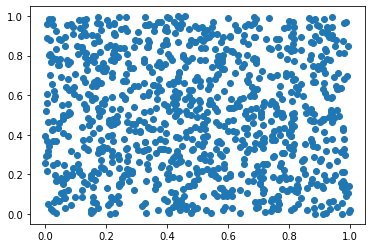

In [21]:
plt.scatter(square_x, square_y)

In [22]:
square_inertias = []
for i in range(1, 25):
    square_model = KMeans(n_clusters = i).fit(list(zip(square_x, square_y)))
    square_inertias.append(square_model.inertia_)

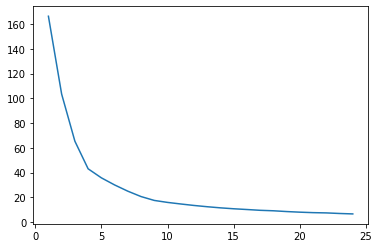

In [23]:
plt.plot(np.arange(1, 25), square_inertias)

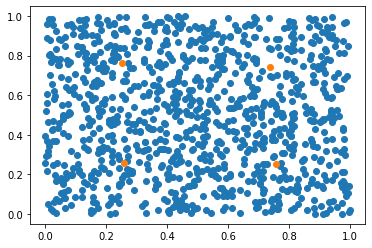

In [24]:
square_model = KMeans(n_clusters = 4).fit(list(zip(square_x, square_y)))
plt.scatter(square_x, square_y)
plt.scatter(list(zip(*square_model.cluster_centers_))[0], list(zip(*square_model.cluster_centers_))[1])

In [25]:
print(square_model.inertia_)

43.05466126890759
